### Syed Asghar Abbas Zaidi (sz07201)
### Data Science Homework 12: Apache Spark 

In [ ]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext, SparkSession

#sc is the Spark Context already available at databricks, so we do not need to create it again.
#sc = SparkContext()
# sqlContext = SQLContext(sc)

# from pyspark.sql import SparkSession
sqlContext = SparkSession.builder.appName('abc').getOrCreate()

# Creating RDD (Resilient Distributed Dataset) - fundamental data structure of Spark

In [ ]:
products = sc.textFile("/FileStore/tables/SalesData.txt")

In [ ]:
products.first()

Out[4]: 'ProductID\tName\tProductNumber\tColor\tStandardCost\tListPrice\tSize\tWeight\tProductCategoryID\tProductModelID\tSellStartDate\tSellEndDate\tDiscontinuedDate\tThumbNailPhoto\tThumbnailPhotoFileName\trowguid\tModifiedDate'

In [ ]:
print("The data has {} columns".format(len(products.first().split("\t"))))
header = products.first().split("\t")
header

The data has 17 columns
Out[5]: ['ProductID',
 'Name',
 'ProductNumber',
 'Color',
 'StandardCost',
 'ListPrice',
 'Size',
 'Weight',
 'ProductCategoryID',
 'ProductModelID',
 'SellStartDate',
 'SellEndDate',
 'DiscontinuedDate',
 'ThumbNailPhoto',
 'ThumbnailPhotoFileName',
 'rowguid',
 'ModifiedDate']

In [ ]:
head = products.first()
content = products.filter(lambda line: line != head)

In [ ]:
content.first()

Out[7]: '680\tHL Road Frame - Black, 58\tFR-R92B-58\tBlack\t1059.31\t1431.50\t58\t1016.04\t18\t6\t1998-06-01 00:00:00.000\tNULL\tNULL\t0x47494638396150003100F70000000000800000008000808000000080800080008080808080C0C0C0FF000000FF00FFFF000000FFFF00FF00FFFFFFFFFF000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000\tno_image_available_small.gif\t43DD68D6-14A4-461F-9069-55309D90EA7E\t2004-03-11 10:01:36.827'

In [ ]:
content.map(lambda line: len(line.split("\t"))).distinct().collect()[0]

Out[8]: 17

# Example of RDD using Scala

In [ ]:
rdd1 = (content.filter(lambda line: line.split("\t"))
 .map(lambda line: (line.split("\t")))
)
rdd1.take(1)

Out[9]: [['680',
  'HL Road Frame - Black, 58',
  'FR-R92B-58',
  'Black',
  '1059.31',
  '1431.50',
  '58',
  '1016.04',
  '18',
  '6',
  '1998-06-01 00:00:00.000',
  'NULL',
  'NULL',
  '0x47494638396150003100F70000000000800000008000808000000080800080008080808080C0C0C0FF000000FF00FFFF000000FFFF00FF00FFFFFFFFFF000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
  'no_image_available_small.gif',
  '43DD68D6-14A4-461F-9069-55309D90EA7E',
  '2004-03-11 10:01:36.827']]

# Converting RDD into Spark Dataframe

In [ ]:
df = rdd1.toDF(header)
df.show()

+---------+--------------------+-------------+-----+------------+---------+----+-------+-----------------+--------------+--------------------+--------------------+----------------+--------------------+----------------------+--------------------+--------------------+
|ProductID|                Name|ProductNumber|Color|StandardCost|ListPrice|Size| Weight|ProductCategoryID|ProductModelID|       SellStartDate|         SellEndDate|DiscontinuedDate|      ThumbNailPhoto|ThumbnailPhotoFileName|             rowguid|        ModifiedDate|
+---------+--------------------+-------------+-----+------------+---------+----+-------+-----------------+--------------+--------------------+--------------------+----------------+--------------------+----------------------+--------------------+--------------------+
|      680|HL Road Frame - B...|   FR-R92B-58|Black|     1059.31|  1431.50|  58|1016.04|               18|             6|1998-06-01 00:00:...|                NULL|            NULL|0x474946383961500..

# Using Two Different Code/Syntax
## Spark Dataframe syntax and SQL Table syntax

### Spark Dataframe syntax

In [ ]:
# selecting two columns Name and Weight from original dataframe and convert into their proper datatype. Default is string
spark_df = df.select(df.Name, df.Weight.cast("float"))
spark_df.show(5, truncate=False)

+-------------------------+-------+
|Name                     |Weight |
+-------------------------+-------+
|HL Road Frame - Black, 58|1016.04|
|HL Road Frame - Red, 58  |1016.04|
|Sport-100 Helmet, Red    |null   |
|Sport-100 Helmet, Black  |null   |
|Mountain Bike Socks, M   |null   |
+-------------------------+-------+
only showing top 5 rows



### SQL Table syntax
First convert the original Spark Dataframe df into SQL Table and then write SQL syntax

In [ ]:
# convert the original Spark Dataframe df into SQL Table
df.createOrReplaceTempView("df_table")
# write SQL query syntax
sqlContext.sql(" SELECT Name, cast(Weight as float) FROM df_table limit 5").show(truncate=False)

+-------------------------+-------+
|Name                     |Weight |
+-------------------------+-------+
|HL Road Frame - Black, 58|1016.04|
|HL Road Frame - Red, 58  |1016.04|
|Sport-100 Helmet, Red    |null   |
|Sport-100 Helmet, Black  |null   |
|Mountain Bike Socks, M   |null   |
+-------------------------+-------+



## Write your solutions using Spark Dataframe syntax and Spark SQL syntax. Your output should match with the RDD output

#### 1. Find the names and weight of the top 15 products by weight. Sort weight by descending order.

##### Using RDD

In [ ]:
(content.filter(lambda line: line.split("\t")[7] != "NULL")
 .map(lambda line: (line.split("\t")[1], float(line.split("\t")[7])))
                     .takeOrdered(15, lambda x : -x[1])
                    )

Out[13]: [('Touring-3000 Blue, 62', 13607.7),
 ('Touring-3000 Yellow, 62', 13607.7),
 ('Touring-3000 Blue, 58', 13562.34),
 ('Touring-3000 Yellow, 58', 13512.45),
 ('Touring-3000 Blue, 54', 13462.55),
 ('Touring-3000 Yellow, 54', 13344.62),
 ('Touring-3000 Yellow, 50', 13213.08),
 ('Touring-3000 Blue, 50', 13213.08),
 ('Touring-3000 Yellow, 44', 13049.78),
 ('Touring-3000 Blue, 44', 13049.78),
 ('Mountain-500 Silver, 52', 13008.96),
 ('Mountain-500 Black, 52', 13008.96),
 ('Mountain-500 Silver, 48', 12891.03),
 ('Mountain-500 Black, 48', 12891.03),
 ('Mountain-500 Silver, 44', 12759.49)]

##### Using Spark DataFrame

In [ ]:
# selecting two columns Name and Weight from original dataframe and convert into their proper datatype. Default is string
spark_df = df.select(df.Name, df.Weight.cast("float"))
# spark_df = spark_df.filter(spark_df.Weight.isNotNull())
spark_df = spark_df.orderBy(spark_df.Weight.desc())
spark_df.show(15, truncate=False)


+-----------------------+--------+
|Name                   |Weight  |
+-----------------------+--------+
|Touring-3000 Blue, 62  |13607.7 |
|Touring-3000 Yellow, 62|13607.7 |
|Touring-3000 Blue, 58  |13562.34|
|Touring-3000 Yellow, 58|13512.45|
|Touring-3000 Blue, 54  |13462.55|
|Touring-3000 Yellow, 54|13344.62|
|Touring-3000 Yellow, 50|13213.08|
|Touring-3000 Blue, 50  |13213.08|
|Touring-3000 Yellow, 44|13049.78|
|Touring-3000 Blue, 44  |13049.78|
|Mountain-500 Silver, 52|13008.96|
|Mountain-500 Black, 52 |13008.96|
|Mountain-500 Silver, 48|12891.03|
|Mountain-500 Black, 48 |12891.03|
|Mountain-500 Silver, 44|12759.49|
+-----------------------+--------+
only showing top 15 rows



##### Using Spark SQL

In [ ]:
sqlContext.sql(" SELECT Name, cast(Weight as float) FROM df_table order by cast(Weight as float) desc limit 15 ").show(truncate=False)

+-----------------------+--------+
|Name                   |Weight  |
+-----------------------+--------+
|Touring-3000 Yellow, 62|13607.7 |
|Touring-3000 Blue, 62  |13607.7 |
|Touring-3000 Blue, 58  |13562.34|
|Touring-3000 Yellow, 58|13512.45|
|Touring-3000 Blue, 54  |13462.55|
|Touring-3000 Yellow, 54|13344.62|
|Touring-3000 Yellow, 50|13213.08|
|Touring-3000 Blue, 50  |13213.08|
|Touring-3000 Yellow, 44|13049.78|
|Touring-3000 Blue, 44  |13049.78|
|Mountain-500 Silver, 52|13008.96|
|Mountain-500 Black, 52 |13008.96|
|Mountain-500 Silver, 48|12891.03|
|Mountain-500 Black, 48 |12891.03|
|Mountain-500 Silver, 44|12759.49|
+-----------------------+--------+



#### 2. Retrieve product details (name, color, size, product model ID) for products where the product model ID is 5

##### Using RDD

In [ ]:
(content.filter(lambda line:line.split("\t")[9]=="5")
 .map(lambda line: (line.split("\t")[1],line.split("\t")[3], line.split("\t")[6], line.split("\t")[9])).collect()
)

Out[16]: [('HL Mountain Frame - Silver, 42', 'Silver', '42', '5'),
 ('HL Mountain Frame - Silver, 44', 'Silver', '44', '5'),
 ('HL Mountain Frame - Silver, 48', 'Silver', '48', '5'),
 ('HL Mountain Frame - Silver, 46', 'Silver', '46', '5'),
 ('HL Mountain Frame - Black, 42', 'Black', '42', '5'),
 ('HL Mountain Frame - Black, 44', 'Black', '44', '5'),
 ('HL Mountain Frame - Black, 48', 'Black', '48', '5'),
 ('HL Mountain Frame - Black, 46', 'Black', '46', '5'),
 ('HL Mountain Frame - Black, 38', 'Black', '38', '5'),
 ('HL Mountain Frame - Silver, 38', 'Silver', '38', '5')]

##### Using Spark Dataframe

In [ ]:
# selecting two columns Name and Weight from original dataframe and convert into their proper datatype. Default is string
spark_df = df.select(df.Name, df.Color, df.Size, df.ProductModelID)
spark_df = spark_df.filter(spark_df["ProductModelID"] == 5)
spark_df.show(15, truncate=False)

+------------------------------+------+----+--------------+
|Name                          |Color |Size|ProductModelID|
+------------------------------+------+----+--------------+
|HL Mountain Frame - Silver, 42|Silver|42  |5             |
|HL Mountain Frame - Silver, 44|Silver|44  |5             |
|HL Mountain Frame - Silver, 48|Silver|48  |5             |
|HL Mountain Frame - Silver, 46|Silver|46  |5             |
|HL Mountain Frame - Black, 42 |Black |42  |5             |
|HL Mountain Frame - Black, 44 |Black |44  |5             |
|HL Mountain Frame - Black, 48 |Black |48  |5             |
|HL Mountain Frame - Black, 46 |Black |46  |5             |
|HL Mountain Frame - Black, 38 |Black |38  |5             |
|HL Mountain Frame - Silver, 38|Silver|38  |5             |
+------------------------------+------+----+--------------+



##### Using Spark SQL

In [ ]:
sqlContext.sql(" SELECT Name, Color, Size, ProductModelID FROM df_table where ProductModelID == 5 limit 15 ").show(truncate=False)

+------------------------------+------+----+--------------+
|Name                          |Color |Size|ProductModelID|
+------------------------------+------+----+--------------+
|HL Mountain Frame - Silver, 42|Silver|42  |5             |
|HL Mountain Frame - Silver, 44|Silver|44  |5             |
|HL Mountain Frame - Silver, 48|Silver|48  |5             |
|HL Mountain Frame - Silver, 46|Silver|46  |5             |
|HL Mountain Frame - Black, 42 |Black |42  |5             |
|HL Mountain Frame - Black, 44 |Black |44  |5             |
|HL Mountain Frame - Black, 48 |Black |48  |5             |
|HL Mountain Frame - Black, 46 |Black |46  |5             |
|HL Mountain Frame - Black, 38 |Black |38  |5             |
|HL Mountain Frame - Silver, 38|Silver|38  |5             |
+------------------------------+------+----+--------------+



#### 3. Retrieve the name and product number of the products that have a color of 'black', 'red', or 'white' and a size of 'S' or 'M'

##### Using RDD

In [ ]:
colors = ["White","Black","Red"]
sizes = ["S","M"]

(content.filter(lambda line: line.split("\t")[6] in sizes)
.filter(lambda line: line.split("\t")[3] in colors)
.map(lambda line: (line.split("\t")[1],line.split("\t")[2], line.split("\t")[3],line.split("\t")[6]))
 .collect()
)

Out[22]: [('Mountain Bike Socks, M', 'SO-B909-M', 'White', 'M'),
 ("Men's Sports Shorts, S", 'SH-M897-S', 'Black', 'S'),
 ("Men's Sports Shorts, M", 'SH-M897-M', 'Black', 'M'),
 ("Women's Tights, S", 'TG-W091-S', 'Black', 'S'),
 ("Women's Tights, M", 'TG-W091-M', 'Black', 'M'),
 ('Half-Finger Gloves, S', 'GL-H102-S', 'Black', 'S'),
 ('Half-Finger Gloves, M', 'GL-H102-M', 'Black', 'M'),
 ('Full-Finger Gloves, S', 'GL-F110-S', 'Black', 'S'),
 ('Full-Finger Gloves, M', 'GL-F110-M', 'Black', 'M'),
 ("Women's Mountain Shorts, S", 'SH-W890-S', 'Black', 'S'),
 ("Women's Mountain Shorts, M", 'SH-W890-M', 'Black', 'M'),
 ('Racing Socks, M', 'SO-R809-M', 'White', 'M')]

##### Using Spark Dataframe

In [ ]:
colors = ["White", "Black", "Red"]
sizes = ["S", "M"]

# Filter the DataFrame based on size and color, and select the desired columns
spark_df = df.filter(df["Size"].isin(sizes)).filter(df["Color"].isin(colors)).select("Name", "ProductNumber", "Color", "Size")
spark_df.show(15, truncate=False)

+--------------------------+-------------+-----+----+
|Name                      |ProductNumber|Color|Size|
+--------------------------+-------------+-----+----+
|Mountain Bike Socks, M    |SO-B909-M    |White|M   |
|Men's Sports Shorts, S    |SH-M897-S    |Black|S   |
|Men's Sports Shorts, M    |SH-M897-M    |Black|M   |
|Women's Tights, S         |TG-W091-S    |Black|S   |
|Women's Tights, M         |TG-W091-M    |Black|M   |
|Half-Finger Gloves, S     |GL-H102-S    |Black|S   |
|Half-Finger Gloves, M     |GL-H102-M    |Black|M   |
|Full-Finger Gloves, S     |GL-F110-S    |Black|S   |
|Full-Finger Gloves, M     |GL-F110-M    |Black|M   |
|Women's Mountain Shorts, S|SH-W890-S    |Black|S   |
|Women's Mountain Shorts, M|SH-W890-M    |Black|M   |
|Racing Socks, M           |SO-R809-M    |White|M   |
+--------------------------+-------------+-----+----+



##### Using Spark SQL

In [ ]:
sqlContext.sql(" SELECT Name, ProductNumber, Color, Size FROM df_table where (Color = 'White' or Color = 'Black' or Color = 'Red') and (Size = 'S' or Size = 'M') limit 15 ").show(truncate=False)

+--------------------------+-------------+-----+----+
|Name                      |ProductNumber|Color|Size|
+--------------------------+-------------+-----+----+
|Mountain Bike Socks, M    |SO-B909-M    |White|M   |
|Men's Sports Shorts, S    |SH-M897-S    |Black|S   |
|Men's Sports Shorts, M    |SH-M897-M    |Black|M   |
|Women's Tights, S         |TG-W091-S    |Black|S   |
|Women's Tights, M         |TG-W091-M    |Black|M   |
|Half-Finger Gloves, S     |GL-H102-S    |Black|S   |
|Half-Finger Gloves, M     |GL-H102-M    |Black|M   |
|Full-Finger Gloves, S     |GL-F110-S    |Black|S   |
|Full-Finger Gloves, M     |GL-F110-M    |Black|M   |
|Women's Mountain Shorts, S|SH-W890-S    |Black|S   |
|Women's Mountain Shorts, M|SH-W890-M    |Black|M   |
|Racing Socks, M           |SO-R809-M    |White|M   |
+--------------------------+-------------+-----+----+



#### 4. Retrieve the product name, product number, color and list price of products whose product number begins with 'BK-'. Retrieve only 15 records and Sort the price in descending order

##### Using RDD

In [ ]:
(content.filter(lambda line: "BK" in line.split("\t")[2])
 .map(lambda line: (line.split("\t")[1], line.split("\t")[2], line.split("\t")[3], float(line.split("\t")[5])))
.takeOrdered(15, lambda x: -x[3]))

Out[40]: [('Road-150 Red, 62', 'BK-R93R-62', 'Red', 3578.27),
 ('Road-150 Red, 44', 'BK-R93R-44', 'Red', 3578.27),
 ('Road-150 Red, 48', 'BK-R93R-48', 'Red', 3578.27),
 ('Road-150 Red, 52', 'BK-R93R-52', 'Red', 3578.27),
 ('Road-150 Red, 56', 'BK-R93R-56', 'Red', 3578.27),
 ('Mountain-100 Silver, 38', 'BK-M82S-38', 'Silver', 3399.99),
 ('Mountain-100 Silver, 42', 'BK-M82S-42', 'Silver', 3399.99),
 ('Mountain-100 Silver, 44', 'BK-M82S-44', 'Silver', 3399.99),
 ('Mountain-100 Silver, 48', 'BK-M82S-48', 'Silver', 3399.99),
 ('Mountain-100 Black, 38', 'BK-M82B-38', 'Black', 3374.99),
 ('Mountain-100 Black, 42', 'BK-M82B-42', 'Black', 3374.99),
 ('Mountain-100 Black, 44', 'BK-M82B-44', 'Black', 3374.99),
 ('Mountain-100 Black, 48', 'BK-M82B-48', 'Black', 3374.99),
 ('Road-250 Red, 44', 'BK-R89R-44', 'Red', 2443.35),
 ('Road-250 Red, 48', 'BK-R89R-48', 'Red', 2443.35)]

##### Using Spark Dataframe

In [ ]:
# Ensure ListPrice is casted to float
spark_df = df.filter(df["ProductNumber"].startswith("BK-"))

# Cast ListPrice to float and select the required columns
spark_df = spark_df.withColumn("ListPrice", df["ListPrice"].cast("float")) \
                   .select("Name", "ProductNumber", "Color", "ListPrice") \
                   .orderBy("ListPrice", ascending=False)  # Sorting by ListPrice in descending order

# Show the top 15 records
spark_df.show(15, truncate=False)


+-----------------------+-------------+------+---------+
|Name                   |ProductNumber|Color |ListPrice|
+-----------------------+-------------+------+---------+
|Road-150 Red, 62       |BK-R93R-62   |Red   |3578.27  |
|Road-150 Red, 44       |BK-R93R-44   |Red   |3578.27  |
|Road-150 Red, 48       |BK-R93R-48   |Red   |3578.27  |
|Road-150 Red, 52       |BK-R93R-52   |Red   |3578.27  |
|Road-150 Red, 56       |BK-R93R-56   |Red   |3578.27  |
|Mountain-100 Silver, 44|BK-M82S-44   |Silver|3399.99  |
|Mountain-100 Silver, 48|BK-M82S-48   |Silver|3399.99  |
|Mountain-100 Silver, 38|BK-M82S-38   |Silver|3399.99  |
|Mountain-100 Silver, 42|BK-M82S-42   |Silver|3399.99  |
|Mountain-100 Black, 38 |BK-M82B-38   |Black |3374.99  |
|Mountain-100 Black, 42 |BK-M82B-42   |Black |3374.99  |
|Mountain-100 Black, 44 |BK-M82B-44   |Black |3374.99  |
|Mountain-100 Black, 48 |BK-M82B-48   |Black |3374.99  |
|Road-250 Red, 44       |BK-R89R-44   |Red   |2443.35  |
|Road-250 Red, 48       |BK-R89

##### Using Spark SQL

In [ ]:
# SQL query to filter, cast, select, and sort the data
sql_query = """
SELECT 
    Name, 
    ProductNumber, 
    Color, 
    CAST(ListPrice AS FLOAT) AS ListPrice
FROM 
    df_table
WHERE 
    ProductNumber LIKE 'BK-%'
ORDER BY 
    ListPrice DESC
"""

# Execute the SQL query and show the result
spark_df_sql = sqlContext.sql(sql_query)
spark_df_sql.show(15, truncate=False)


+-----------------------+-------------+------+---------+
|Name                   |ProductNumber|Color |ListPrice|
+-----------------------+-------------+------+---------+
|Road-150 Red, 62       |BK-R93R-62   |Red   |3578.27  |
|Road-150 Red, 44       |BK-R93R-44   |Red   |3578.27  |
|Road-150 Red, 48       |BK-R93R-48   |Red   |3578.27  |
|Road-150 Red, 52       |BK-R93R-52   |Red   |3578.27  |
|Road-150 Red, 56       |BK-R93R-56   |Red   |3578.27  |
|Mountain-100 Silver, 44|BK-M82S-44   |Silver|3399.99  |
|Mountain-100 Silver, 48|BK-M82S-48   |Silver|3399.99  |
|Mountain-100 Silver, 38|BK-M82S-38   |Silver|3399.99  |
|Mountain-100 Silver, 42|BK-M82S-42   |Silver|3399.99  |
|Mountain-100 Black, 38 |BK-M82B-38   |Black |3374.99  |
|Mountain-100 Black, 42 |BK-M82B-42   |Black |3374.99  |
|Mountain-100 Black, 44 |BK-M82B-44   |Black |3374.99  |
|Mountain-100 Black, 48 |BK-M82B-48   |Black |3374.99  |
|Road-250 Red, 44       |BK-R89R-44   |Red   |2443.35  |
|Road-250 Red, 48       |BK-R89

#### 5. Visualize Average List Price per Color and Average List Price per Size. Discuss/Explain your results.

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pyspark.sql import functions as F
%matplotlib inline

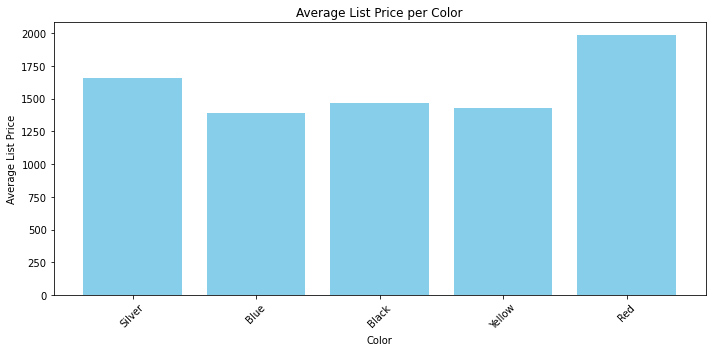

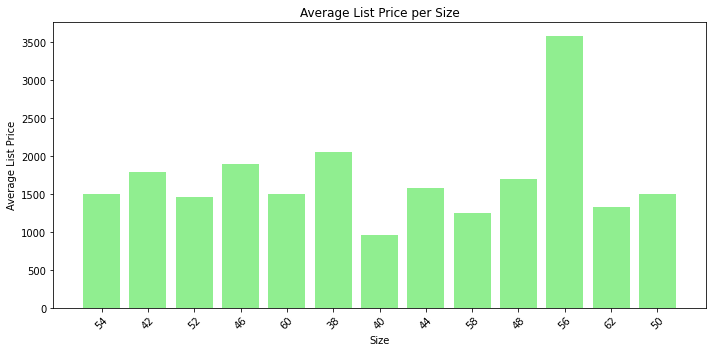

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, regexp_extract

# 1. Average List Price per Color
avg_price_per_color = spark_df.groupBy("Color").agg({"ListPrice": "avg"}).withColumnRenamed("avg(ListPrice)", "AvgListPrice")

# 2. Extract Size from the Name and Calculate Average List Price per Size
# Using regular expressions to extract the size from the product name
spark_df_with_size = spark_df.withColumn("Size", regexp_extract("Name", r'(\d+)$', 0))

# Now calculate the average list price per size
avg_price_per_size = spark_df_with_size.groupBy("Size").agg({"ListPrice": "avg"}).withColumnRenamed("avg(ListPrice)", "AvgListPrice")

# Collect the data to Pandas DataFrame for visualization
color_avg_df = avg_price_per_color.toPandas()
size_avg_df = avg_price_per_size.toPandas()

# Visualize Average List Price per Color
plt.figure(figsize=(10, 5))
plt.bar(color_avg_df['Color'], color_avg_df['AvgListPrice'], color='skyblue')
plt.title("Average List Price per Color")
plt.xlabel("Color")
plt.ylabel("Average List Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize Average List Price per Size
plt.figure(figsize=(10, 5))
plt.bar(size_avg_df['Size'], size_avg_df['AvgListPrice'], color='lightgreen')
plt.title("Average List Price per Size")
plt.xlabel("Size")
plt.ylabel("Average List Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The **Average List Price per Color** chart highlights intriguing trends in how color impacts pricing, likely influenced by consumer preferences and product positioning. Red emerges as the most expensive color, suggesting it could be associated with luxury, exclusivity, or a higher perceived value in the market. Colors often carry emotional and cultural connotations, and red is frequently linked with passion, power, and high status, which might explain why items in this color command a premium. Silver, which also has a relatively high average price, may appeal to customers who associate it with elegance and modernity. On the other hand, colors like Blue, Black, and Yellow have lower average prices, possibly because they cater to more practical or widely available product categories. For instance, Black and Blue, though popular, might be used in items where cost efficiency is prioritized over aesthetic differentiation, making them more affordable.

The **Average List Price per Size** chart reveals how size influences pricing, likely reflecting production costs, availability, and market demand for specific sizes. Size 56 stands out with a significantly higher average price, suggesting it is tied to a specialized or premium product line. Larger sizes, such as 60 and 58, also exhibit higher prices, which may be attributed to increased material costs or their association with high-value items in specific industries. Smaller sizes, such as 40 and 44, tend to have lower prices, perhaps because they are more common or cater to less expensive product lines. The sharp rise in price for size 56 could indicate a niche market where that size is particularly valued—either due to limited production or specialized applications. These patterns underline how manufacturers and sellers strategically price items based on size to balance demand, costs, and profitability, making size a key determinant in the overall pricing strategy.

#### 6. Visualize Total Count per Size. Discuss/Explain your results.

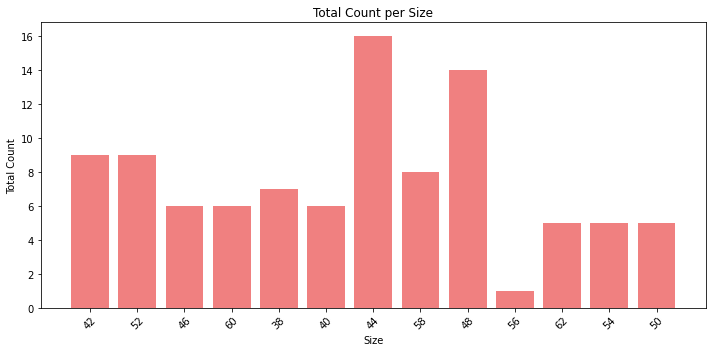

In [ ]:
# Extract size from the product name (as before)
spark_df_with_size = spark_df.withColumn("Size", regexp_extract("Name", r'(\d+)$', 0))

# Group by the Size and count the occurrences
size_count = spark_df_with_size.groupBy("Size").count()

# Collect the data to Pandas DataFrame for visualization
size_count_df = size_count.toPandas()

# Visualize Total Count per Size
plt.figure(figsize=(10, 5))
plt.bar(size_count_df['Size'], size_count_df['count'], color='lightcoral')
plt.title("Total Count per Size")
plt.xlabel("Size")
plt.ylabel("Total Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The **Total Count per Size** chart provides valuable insights into the distribution of items across various sizes. The size 44 has the highest count, indicating that it is the most commonly available size in the dataset. This could suggest that size 44 represents a standard or widely demanded size, perhaps due to its suitability for a larger audience or its use in versatile products. Similarly, sizes such as 52 and 58 also have relatively higher counts, which may indicate that these sizes are popular in the market, possibly serving mid-range or general-purpose product categories. On the other hand, sizes such as 56 and 62 have noticeably lower counts, with size 56 having the least. This suggests that these sizes might cater to niche markets or are produced in limited quantities due to specialized demand.

The variation in counts across sizes might also explain the pricing trends observed earlier. Sizes with higher availability, like 44, tend to have lower average list prices due to economies of scale and widespread accessibility. Conversely, sizes like 56, with the lowest count, exhibit higher average prices, likely driven by their rarity and the premium associated with specialized products. This distribution highlights the impact of supply dynamics on pricing strategies, where scarcity often correlates with higher prices, while more common sizes align with lower-cost product lines. Ultimately, the chart emphasizes how market demand and production considerations shape both the availability and pricing of items across different sizes.

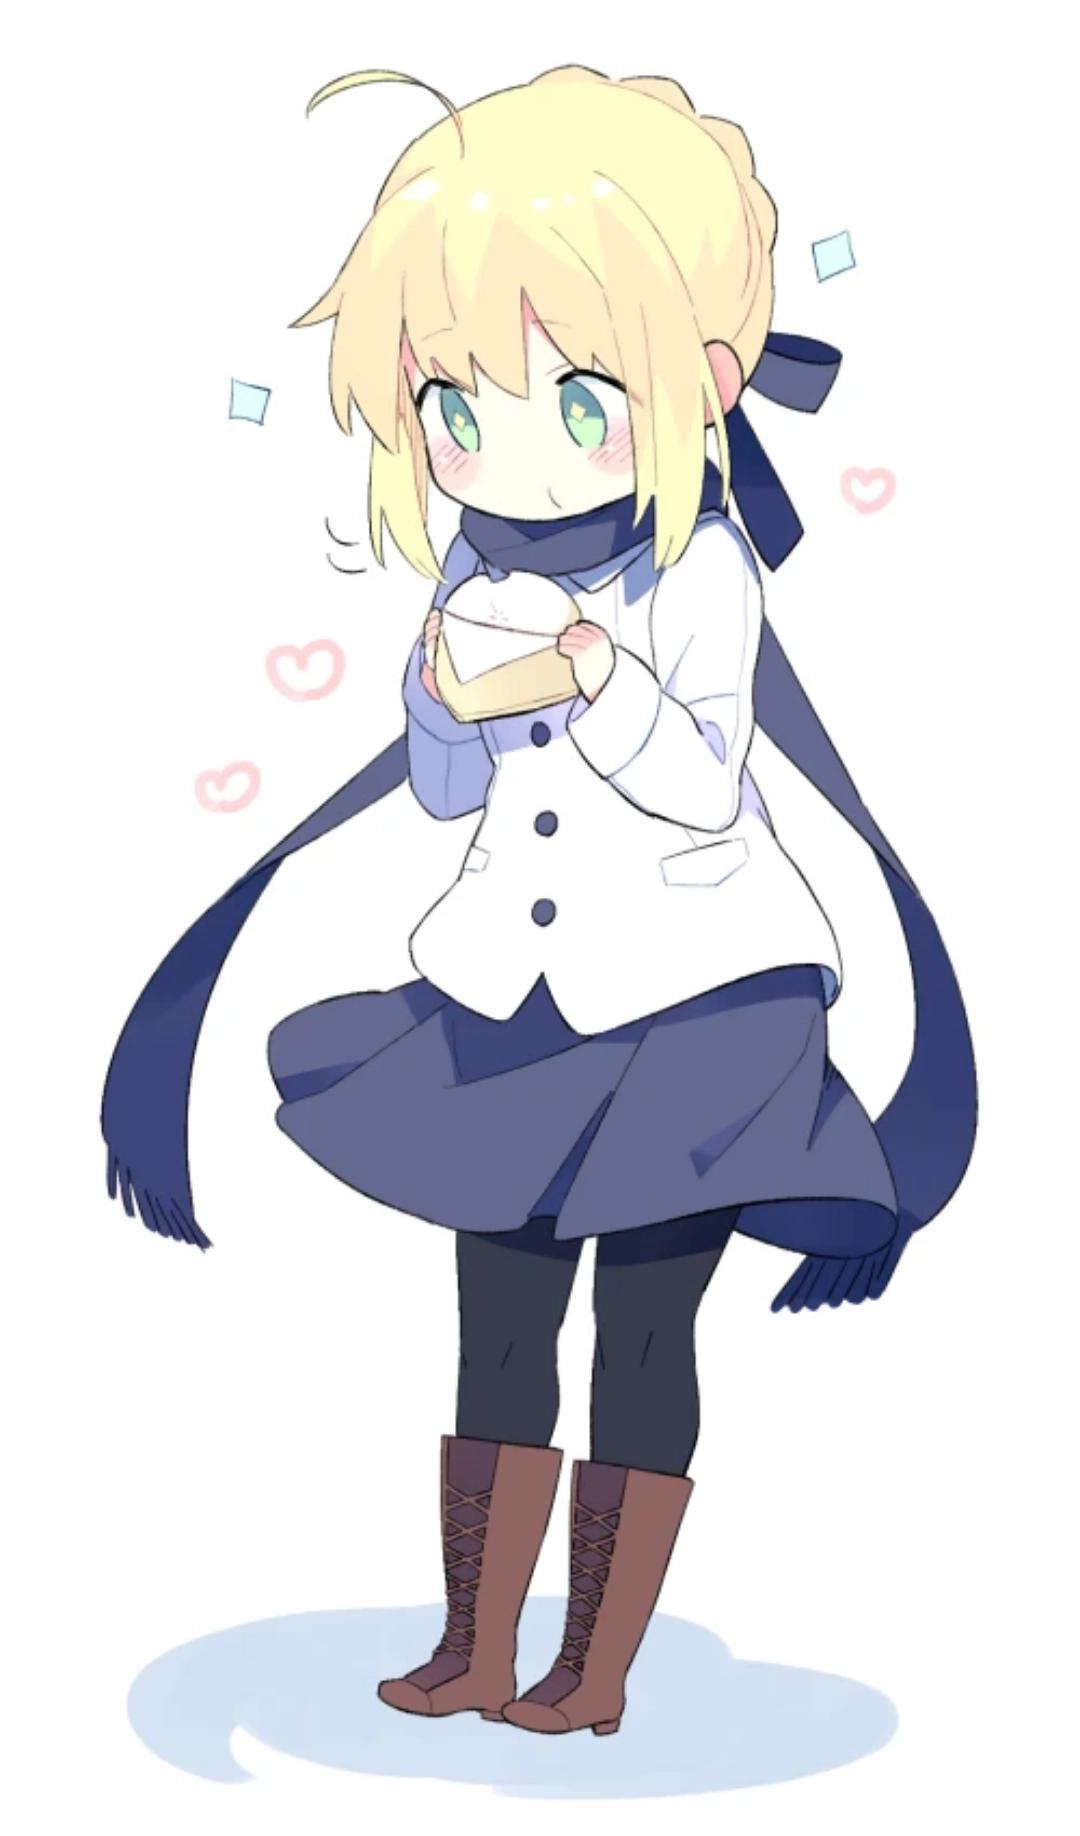

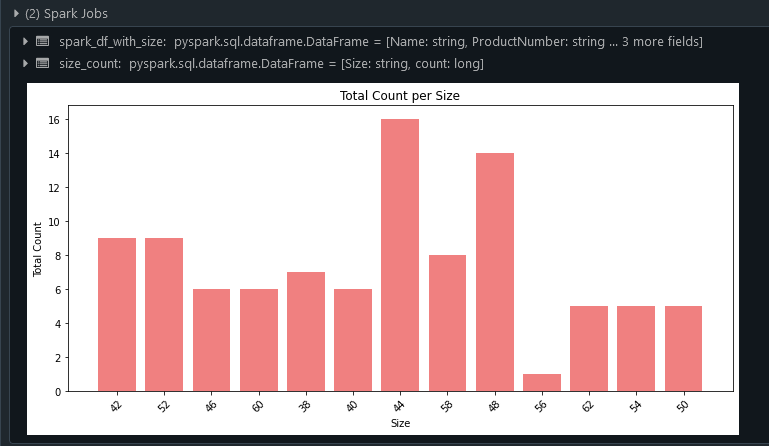

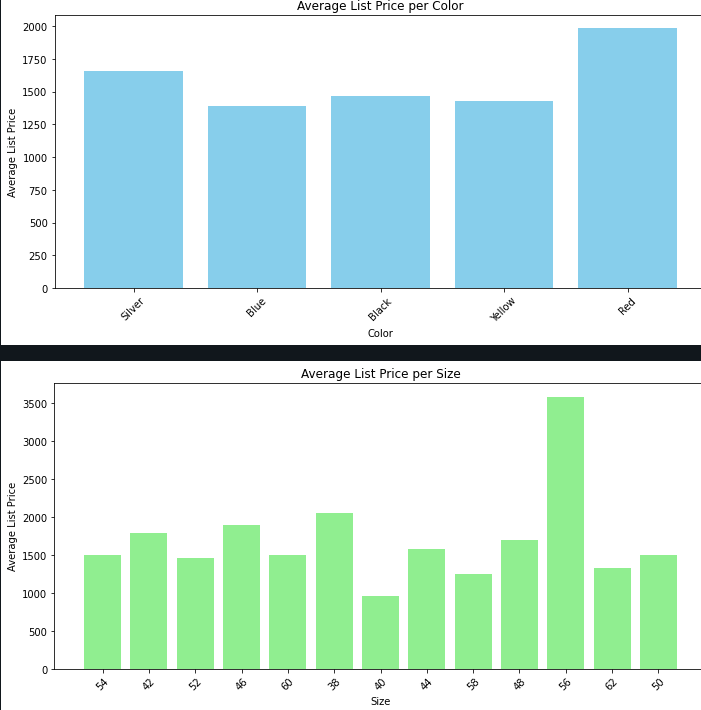

In [8]:
from IPython.display import Image, display

# Load and display image
image_path = 'Saber02.jpg' 
display(Image(filename=image_path,width=400))

#When I tried running this file locally to just insert saber picture, I realized the graph weren't properly showcasing, attaching them just in case
image_path = 'Visualization2 (1).png' 
display(Image(filename=image_path,width=400))

image_path = 'Visualization2 (2).png' 
display(Image(filename=image_path,width=400))


# Using Machine Learning Library (For Practice)

In [ ]:
dfall = df.select(df.Weight.cast("float"), df.Size.cast("float"), df.ListPrice.cast("float"))
dfall.show(5, truncate=False)

In [ ]:
dfall = dfall.na.drop("any")

In [ ]:
feature_columns = dfall.columns[:-1] # here we omit the final column for prediction
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=feature_columns,outputCol="features")

In [ ]:
data_2 = assembler.transform(dfall)

In [ ]:
data_2.show()

In [ ]:
from pyspark.ml.regression import LinearRegression

In [ ]:
algo = LinearRegression(featuresCol="features", labelCol="ListPrice")

In [ ]:
model = algo.fit(data_2)

In [ ]:
evaluation_summary = model.evaluate(data_2)

In [ ]:
evaluation_summary.rootMeanSquaredError

In [ ]:
evaluation_summary.r2